In [1]:
from skimage.io import imread, imsave
import math
import pandas as pd
import numpy as np
import pylab
%matplotlib inline
from sklearn.cluster import KMeans
from skimage.util import img_as_float

In [2]:
image = imread('D:/coursera/12(1)/k.jpg')

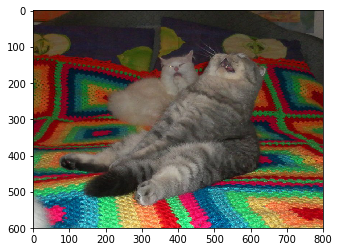

In [3]:
pylab.imshow(image)

In [4]:
float_image = img_as_float(image)
w, h, d = float_image.shape

In [5]:
pixels = pd.DataFrame(np.reshape(float_image, (w*h, d)), columns=["R","G","B"])

In [6]:
def cluster(pixels, n_clusters=8):
    print ('Clustering: ' + str(n_clusters))

    pixels = pixels.copy()
    model = KMeans(n_clusters=n_clusters, init='k-means++', random_state=241)
    pixels['cluster'] = model.fit_predict(pixels)

    means = pixels.groupby('cluster').mean().values
    mean_pixels = [means[c] for c in pixels['cluster'].values]
    mean_image = np.reshape(mean_pixels, (w, h, d))
    imsave('D:/coursera/12(1)/k_mean_' + str(n_clusters) + '.jpg', mean_image)

    medians = pixels.groupby('cluster').median().values
    median_pixels = [medians[c] for c in pixels['cluster'].values]
    median_image = np.reshape(median_pixels, (w, h, d))
    imsave('D:/coursera/12(1)/k_median_' + str(n_clusters) + '.jpg', median_image)

    return mean_image, median_image

In [7]:
def psnr(image1, image2):
    mse = np.mean((image1 - image2) ** 2)
    return 10 * math.log10(float(1) / mse)

In [9]:
for n in range(1, 21):
    mean_image, median_image = cluster(pixels, n)
    psnr_mean, psnr_median = psnr(float_image, mean_image), psnr(float_image, median_image)
    print (psnr_mean, psnr_median)

    if psnr_mean > 30 or psnr_median > 30:
        print(n)
        break

Clustering: 1


C:\Users\OhWhee\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: D:/coursera/12(1)/k_mean_1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\OhWhee\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\OhWhee\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: D:/coursera/12(1)/k_median_1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


14.231136301132972 14.121787717569898
Clustering: 2
16.75608967138584 16.62254946854813
Clustering: 3
18.091124330366156 17.923351311068558
Clustering: 4
19.230459031979198 19.045002886661578
Clustering: 5
20.149701335321943 19.920473549694336
Clustering: 6
20.871091831387517 20.75555508672742
Clustering: 7
21.44744632285843 21.33407791416374
Clustering: 8
22.10494657637774 22.01070117037258
Clustering: 9
22.548857018910983 22.471054531097934
Clustering: 10
22.993229822699224 22.907308244243332
Clustering: 11
23.460730923614594 23.361387854044384
Clustering: 12
23.821521578798233 23.716883128824115
Clustering: 13
24.212142697565355 24.136749517243178
Clustering: 14
24.497049663179805 24.405922356685032
Clustering: 15
24.767515567060396 24.68208641027925
Clustering: 16
24.994741325334687 24.907200409856756
Clustering: 17


KeyboardInterrupt: 